# DATA ANALYSIS AND VISUALIZATION FILE
This file is for data analysis and visualization of the data. the data is imported from 'loading_data.ipynb', so make sure the data preprocessing is working correctly within that notebook.

In [12]:
import os
import pandas as pd
import seaborn as sns
from src.loading_functions import load_or_download_lego_data,preprocess_data
import requests
import matplotlib.pyplot as plt

In [13]:
#get cwd
cwd = os.getcwd()
#get data folder
data_folder = os.path.join(cwd, 'data')

In [14]:
#load or download lego data
df = load_or_download_lego_data(data_folder) #check if you have dependencies installed. else run first cell
df = preprocess_data(df)

Loading data from c:\DTU\Social_Data\project\MarcusGalea.github.io\data\lego_sets.csv


c:\DTU\Social_Data\project\MarcusGalea.github.io\src\loading_functions.py:10: DtypeWarning: Columns (34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(os.path.join(data_folder, 'lego_sets.csv'))
c:\DTU\Social_Data\project\MarcusGalea.github.io\src\loading_functions.py:47: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[df.columns[date_columns]] = df[df.columns[date_columns]].applymap(lambda x: x.split("T")[0])


In [15]:
df.columns

Index(['setID', 'number', 'numberVariant', 'name', 'year', 'theme',
       'themeGroup', 'subtheme', 'category', 'released', 'pieces', 'minifigs',
       'ownedBy', 'wantedBy', 'rating', 'reviewCount', 'packagingType',
       'availability', 'instructionsCount', 'minAge', 'maxAge', 'tags',
       'lastUpdated', 'urlRetailPriceCheckPLN', 'US_retailPrice',
       'US_dateFirstAvailable', 'US_dateLastAvailable', 'UK_retailPrice',
       'UK_dateFirstAvailable', 'UK_dateLastAvailable', 'CA_retailPrice',
       'CA_dateFirstAvailable', 'CA_dateLastAvailable', 'DE_retailPrice',
       'DE_dateFirstAvailable', 'DE_dateLastAvailable', 'PL_retailPrice',
       'Date', 'status', 'US_retail_price', 'UK_retail_price',
       'CA_retail_price', 'DE_retail_price', 'PL_retail_price'],
      dtype='object')

In [16]:
#Get the interesting columns of the dataset
countries = ["US", "UK", "CA", "DE", "PL"]
conversion_to_euro = {"US": 0.85, "UK": 1.17, "CA": 0.68, "PL": 0.23, "DE": 1}
retail_price_columns = [country + "_retail_price" for country in countries]
#date columns
date_columns = ["date" in column for column in df.columns]
df.columns[date_columns]

Index(['lastUpdated', 'US_dateFirstAvailable', 'US_dateLastAvailable',
       'UK_dateFirstAvailable', 'UK_dateLastAvailable',
       'CA_dateFirstAvailable', 'CA_dateLastAvailable',
       'DE_dateFirstAvailable', 'DE_dateLastAvailable'],
      dtype='object')

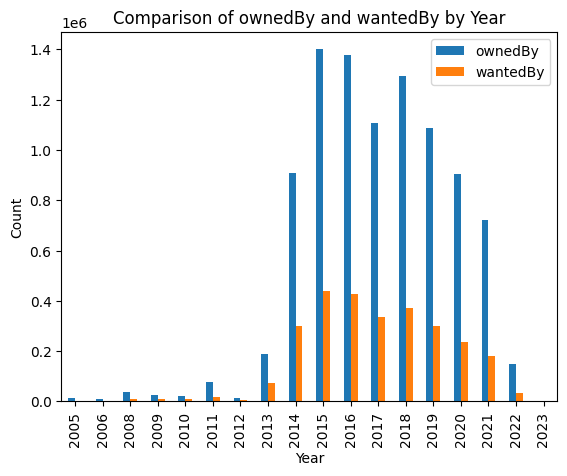

In [17]:
# Group by 'year' and calculate the sum of 'ownedBy' and 'wantedBy'
grouped_df = df.groupby('year')[['ownedBy', 'wantedBy']].sum()

# Plot
grouped_df.plot(kind='bar', stacked=False)
plt.title('Comparison of ownedBy and wantedBy by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [18]:
#export the plot as html


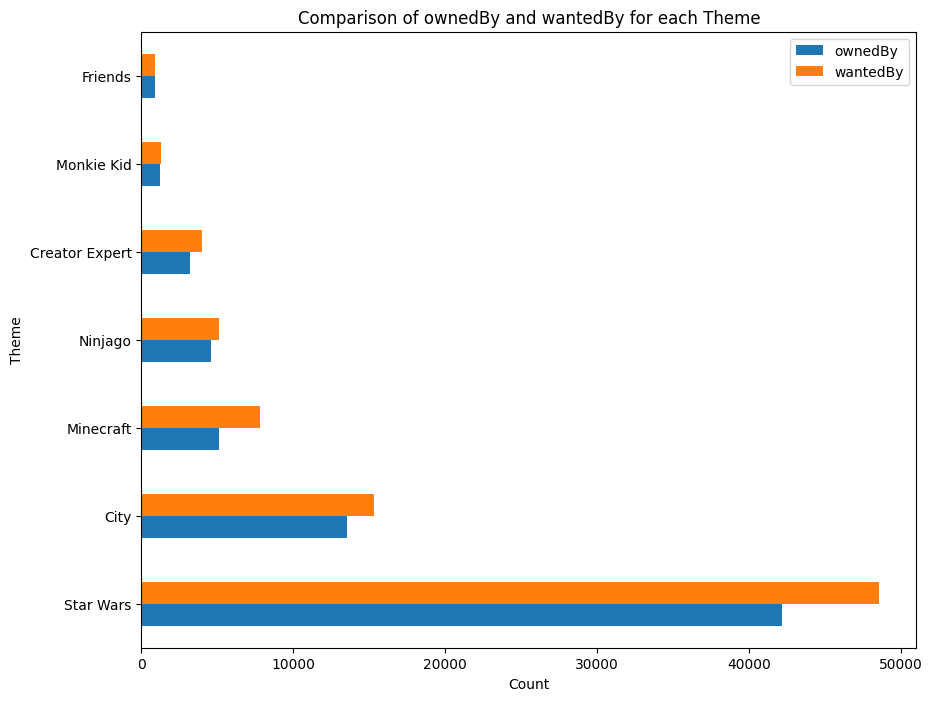

In [19]:
# Filter the dataframe to include only rows where 'wantedBy' is higher than 'ownedBy'
filtered_df = df[df['wantedBy'] > df['ownedBy']]

# Group the filtered dataframe by 'theme' and calculate the sum of 'ownedBy' and 'wantedBy'
grouped_df = filtered_df.groupby('theme')[['ownedBy', 'wantedBy']].sum()

# Sort the grouped dataframe by the difference between 'wantedBy' and 'ownedBy'
grouped_df = grouped_df.sort_values(by=['wantedBy', 'ownedBy'], ascending=False)

# Create the horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 8))
grouped_df[['ownedBy', 'wantedBy']].plot(kind='barh', ax=ax)

# Set the labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Theme')
ax.set_title('Comparison of ownedBy and wantedBy for each Theme')

# Show the plot
plt.show()

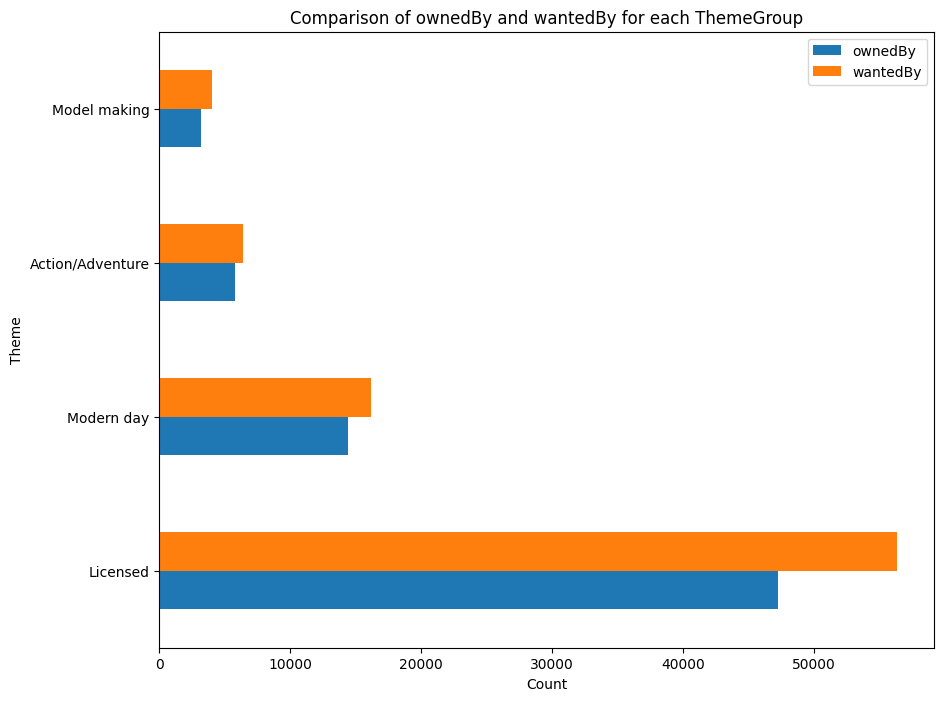

In [20]:
# Filter the dataframe to include only rows where 'wantedBy' is higher than 'ownedBy'
filtered_df = df[df['wantedBy'] > df['ownedBy']]

# Group the filtered dataframe by 'theme' and calculate the sum of 'ownedBy' and 'wantedBy'
grouped_df = filtered_df.groupby('themeGroup')[['ownedBy', 'wantedBy']].sum()

# Sort the grouped dataframe by the difference between 'wantedBy' and 'ownedBy'
grouped_df = grouped_df.sort_values(by=['wantedBy', 'ownedBy'], ascending=False)

# Create the horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 8))
grouped_df[['ownedBy', 'wantedBy']].plot(kind='barh', ax=ax)

# Set the labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Theme')
ax.set_title('Comparison of ownedBy and wantedBy for each ThemeGroup')

# Show the plot
plt.show()

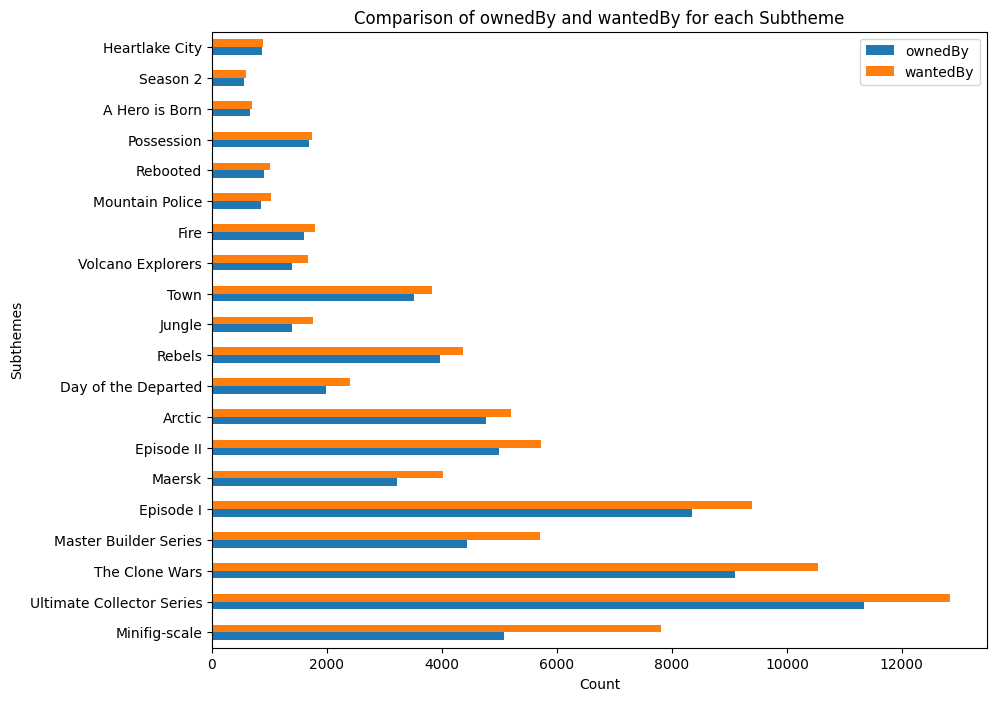

In [21]:
# Filter the dataframe to include only rows where 'wantedBy' is higher than 'ownedBy'
filtered_df = df[df['wantedBy'] > df['ownedBy']]

# Group the filtered dataframe by 'theme' and calculate the sum of 'ownedBy' and 'wantedBy'
grouped_df = filtered_df.groupby('subtheme')[['ownedBy', 'wantedBy']].sum()

# Sort the grouped dataframe by the difference between 'wantedBy' and 'ownedBy'
grouped_df['difference'] = grouped_df['wantedBy'] - grouped_df['ownedBy']
grouped_df = grouped_df.sort_values('difference', ascending=False)

# Create the horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 8))
grouped_df[['ownedBy', 'wantedBy']].plot(kind='barh', ax=ax)

# Set the labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Subthemes')
ax.set_title('Comparison of ownedBy and wantedBy for each Subtheme')

# Show the plot
plt.show()

trial to make the 3 graphs above interactive. theme, themegroups and subthemes

In [23]:
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.palettes import Spectral3
from bokeh.transform import dodge

In [25]:
# Filter the dataframe to include only rows where 'wantedBy' is higher than 'ownedBy'
filtered_df = df[df['wantedBy'] > df['ownedBy']]

# Group the filtered dataframe by 'theme' and calculate the sum of 'ownedBy' and 'wantedBy'
grouped_df = filtered_df.groupby('theme')[['ownedBy', 'wantedBy']].sum()

# Sort the grouped dataframe by the difference between 'wantedBy' and 'ownedBy'
grouped_df['difference'] = grouped_df['wantedBy'] - grouped_df['ownedBy']
grouped_df = grouped_df.sort_values('difference', ascending=False)

# Reset index to use 'subtheme' in ColumnDataSource
grouped_df = grouped_df.reset_index()

# Create a ColumnDataSource from df
source = ColumnDataSource(grouped_df)

# Create a new figure
p = figure(y_range=grouped_df['theme'], height=600, width=800, title='Comparison of ownedBy and wantedBy for each Theme')

# Create horizontal bar charts
p.hbar(y=dodge('theme', -0.25, range=p.y_range), right='ownedBy', height=0.4, color=Spectral3[0], source=source, legend_label="ownedBy")
p.hbar(y=dodge('theme', 0.25, range=p.y_range), right='wantedBy', height=0.4, color=Spectral3[1], source=source, legend_label="wantedBy")

# Add a hover tool
hover = HoverTool(tooltips=[("ownedBy", "@ownedBy"), ("wantedBy", "@wantedBy")])
p.add_tools(hover)

# Move the legend to the upper right corner
p.legend.location = "top_right"

# Show the plot
output_notebook()
show(p)

Loading BokehJS ...

In [26]:
# Filter the dataframe to include only rows where 'wantedBy' is higher than 'ownedBy'
filtered_df = df[df['wantedBy'] > df['ownedBy']]

# Group the filtered dataframe by 'theme' and calculate the sum of 'ownedBy' and 'wantedBy'
grouped_df = filtered_df.groupby('themeGroup')[['ownedBy', 'wantedBy']].sum()

# Sort the grouped dataframe by the difference between 'wantedBy' and 'ownedBy'
grouped_df['difference'] = grouped_df['wantedBy'] - grouped_df['ownedBy']
grouped_df = grouped_df.sort_values('difference', ascending=False)

# Reset index to use 'subtheme' in ColumnDataSource
grouped_df = grouped_df.reset_index()

# Create a ColumnDataSource from df
source = ColumnDataSource(grouped_df)

# Create a new figure
p = figure(y_range=grouped_df['themeGroup'], height=600, width=800, title='Comparison of ownedBy and wantedBy for each ThemeGroup')

# Create horizontal bar charts
p.hbar(y=dodge('themeGroup', -0.25, range=p.y_range), right='ownedBy', height=0.4, color=Spectral3[0], source=source, legend_label="ownedBy")
p.hbar(y=dodge('themeGroup', 0.25, range=p.y_range), right='wantedBy', height=0.4, color=Spectral3[1], source=source, legend_label="wantedBy")

# Add a hover tool
hover = HoverTool(tooltips=[("ownedBy", "@ownedBy"), ("wantedBy", "@wantedBy")])
p.add_tools(hover)

# Move the legend to the upper right corner
p.legend.location = "top_right"

# Show the plot
output_notebook()
show(p)

Loading BokehJS ...

In [ ]:


# Filter the dataframe to include only rows where 'wantedBy' is higher than 'ownedBy'
filtered_df = df[df['wantedBy'] > df['ownedBy']]

# Group the filtered dataframe by 'theme' and calculate the sum of 'ownedBy' and 'wantedBy'
grouped_df = filtered_df.groupby('subtheme')[['ownedBy', 'wantedBy']].sum()

# Sort the grouped dataframe by the difference between 'wantedBy' and 'ownedBy'
grouped_df['difference'] = grouped_df['wantedBy'] - grouped_df['ownedBy']
grouped_df = grouped_df.sort_values('difference', ascending=False)

# Reset index to use 'subtheme' in ColumnDataSource
grouped_df = grouped_df.reset_index()

# Create a ColumnDataSource from df
source = ColumnDataSource(grouped_df)

# Create a new figure
p = figure(y_range=grouped_df['subtheme'], height=600, width=800, title='Comparison of ownedBy and wantedBy for each Subtheme')

# Create horizontal bar charts
p.hbar(y=dodge('subtheme', -0.25, range=p.y_range), right='ownedBy', height=0.4, color=Spectral3[0], source=source, legend_label="ownedBy")
p.hbar(y=dodge('subtheme', 0.25, range=p.y_range), right='wantedBy', height=0.4, color=Spectral3[1], source=source, legend_label="wantedBy")

# Add a hover tool
hover = HoverTool(tooltips=[("ownedBy", "@ownedBy"), ("wantedBy", "@wantedBy")])
p.add_tools(hover)

# Move the legend to the upper right corner
p.legend.location = "top_right"

# Show the plot
output_notebook()
show(p)

Loading BokehJS ...

In [29]:
from bokeh.models import CheckboxGroup, CustomJS
from bokeh.layouts import column

# Create a CheckboxGroup widget
checkbox_group = CheckboxGroup(labels=["Themes", "ThemeGroups", "Subthemes"], active=[0, 1, 2])

# Create a CustomJS callback to update the graph based on the selected options
callback = CustomJS(args=dict(p=p, source=source, checkbox_group=checkbox_group), code="""
    // Get the selected options
    var selected = checkbox_group.active.map(i => checkbox_group.labels[i]);

    // Update the graph based on the selected options
    if (selected.includes("Themes")) {
        // Update the graph for 'Themes'
    }
    if (selected.includes("ThemeGroups")) {
        // Update the graph for 'ThemeGroups'
    }
    if (selected.includes("Subthemes")) {
        // Update the graph for 'Subthemes'
    }
""")

# Attach the callback to the CheckboxGroup widget
checkbox_group.js_on_change("active", callback)

# Add the CheckboxGroup widget to the layout
layout = column(checkbox_group, p)

# Show the plot
output_notebook()
show(layout)

Loading BokehJS ...

In [33]:
# Filter the dataframe to include only rows where 'wantedBy' is higher than 'ownedBy'
filtered_df = df[df['wantedBy'] > df['ownedBy']]

# Group the filtered dataframe by 'theme' and calculate the sum of 'ownedBy' and 'wantedBy'
grouped_df = filtered_df.groupby('theme')[['ownedBy', 'wantedBy']].sum()

# Sort the grouped dataframe by the difference between 'wantedBy' and 'ownedBy'
grouped_df['difference'] = grouped_df['wantedBy'] - grouped_df['ownedBy']
grouped_df = grouped_df.sort_values('difference', ascending=False)

# Reset index to use 'subtheme' in ColumnDataSource
grouped_df = grouped_df.reset_index()

# Create a ColumnDataSource from df
source = ColumnDataSource(grouped_df)

# Create a new figure
p = figure(y_range=grouped_df['theme'], height=600, width=800, title='Comparison of ownedBy and wantedBy for each Theme')

# Create horizontal bar charts with specified colors
p.hbar(y=dodge('theme', -0.25, range=p.y_range), right='ownedBy', height=0.4, color="#add8e6", source=source, legend_label="ownedBy")  # Light blue
p.hbar(y=dodge('theme', 0.25, range=p.y_range), right='wantedBy', height=0.4, color="#ffa07a", source=source, legend_label="wantedBy")  # Light salmon

# Add a hover tool
hover = HoverTool(tooltips=[("ownedBy", "@ownedBy"), ("wantedBy", "@wantedBy")])
p.add_tools(hover)

# Move the legend to the upper right corner
p.legend.location = "top_right"

# Add interactivity to the legend
p.legend.click_policy = "hide"

# Show the plot
output_notebook()
show(p)

Loading BokehJS ...

In [ ]:


# Filter the dataframe to include only rows where 'wantedBy' is higher than 'ownedBy'
filtered_df = df[df['wantedBy'] > df['ownedBy']]

# Group the filtered dataframe by 'theme' and calculate the sum of 'ownedBy' and 'wantedBy'
grouped_df = filtered_df.groupby('subtheme')[['ownedBy', 'wantedBy']].sum()

# Sort the grouped dataframe by the difference between 'wantedBy' and 'ownedBy'
grouped_df['difference'] = grouped_df['wantedBy'] - grouped_df['ownedBy']
grouped_df = grouped_df.sort_values('difference', ascending=False)

# Reset index to use 'subtheme' in ColumnDataSource
grouped_df = grouped_df.reset_index()

# Create a ColumnDataSource from df
source = ColumnDataSource(grouped_df)

# Create a new figure
p = figure(y_range=grouped_df['subtheme'], height=600, width=800, title='Comparison of ownedBy and wantedBy for each Subtheme')

# Create horizontal bar charts with specified colors
p.hbar(y=dodge('subtheme', -0.25, range=p.y_range), right='ownedBy', height=0.4, color="#add8e6", source=source, legend_label="ownedBy")  # Light blue
p.hbar(y=dodge('subtheme', 0.25, range=p.y_range), right='wantedBy', height=0.4, color="#ffa07a", source=source, legend_label="wantedBy")  # Light salmon

# Add a hover tool
hover = HoverTool(tooltips=[("ownedBy", "@ownedBy"), ("wantedBy", "@wantedBy")])
p.add_tools(hover)

# Move the legend to the upper right corner
p.legend.location = "top_right"

# Add interactivity to the legend
p.legend.click_policy = "hide"

# Show the plot
output_notebook()
show(p)

Loading BokehJS ...

In [ ]:
#export p as html
from bokeh.io import output_file

output_file("subtheme.html")
show(p)


In [ ]:
# Select the top 20 subthemes
#Top_subthemes = grouped_df.head(20)

# Get the names of the top 20 subthemes
top_subthemes_names = grouped_df.head(20).index

# Filter the original dataframe to only include the top 20 subthemes
filtered_df = df[df['subtheme'].isin(top_subthemes_names)]

In [ ]:
df.columns


Index(['setID', 'number', 'numberVariant', 'name', 'year', 'theme',
       'themeGroup', 'subtheme', 'category', 'released', 'pieces', 'minifigs',
       'ownedBy', 'wantedBy', 'rating', 'reviewCount', 'packagingType',
       'availability', 'instructionsCount', 'minAge', 'maxAge', 'tags',
       'lastUpdated', 'urlRetailPriceCheckPLN', 'US_retailPrice',
       'US_dateFirstAvailable', 'US_dateLastAvailable', 'UK_retailPrice',
       'UK_dateFirstAvailable', 'UK_dateLastAvailable', 'CA_retailPrice',
       'CA_dateFirstAvailable', 'CA_dateLastAvailable', 'DE_retailPrice',
       'DE_dateFirstAvailable', 'DE_dateLastAvailable', 'PL_retailPrice',
       'Date', 'status'],
      dtype='object')

HEAT MAP - REALISED DATES (HOVER)

In [ ]:
import calmap
import ipywidgets as widgets
from IPython.display import display

In [ ]:
from bokeh.models import CheckboxGroup, CustomJS, LinearColorMapper, BasicTicker, PrintfTickFormatter, ColorBar, Select, Slider
from bokeh.layouts import column
from bokeh.transform import linear_cmap, factor_cmap, transform
from bokeh.palettes import Spectral6, Viridis256
import numpy as np
from datetime import datetime
import panel as pn

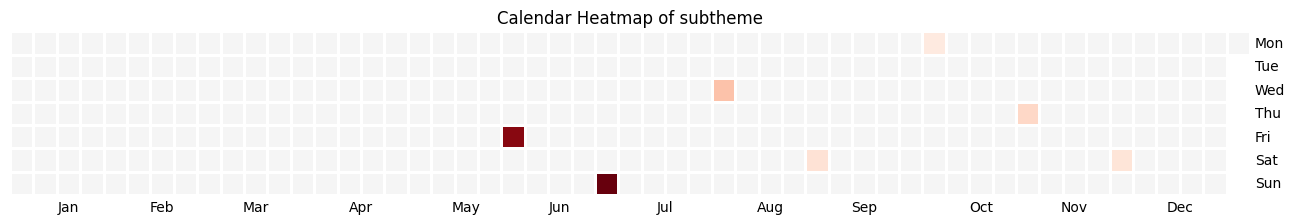

In [ ]:
# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a pivot table with 'Date' as index and the count of 'Theme' as values
pivot_df = df.pivot_table(index='Date', aggfunc='count')['subtheme']

# Create a calendar heatmap
plt.figure(figsize=(16,10))
calmap.yearplot(data=pivot_df, year=2018)  # Change the year to the year you want to plot
plt.title('Calendar Heatmap of subtheme')
plt.show()

trial interactive

In [ ]:
import plotly.graph_objects as go

filtered_df['UK_dateFirstAvailable'] = pd.to_datetime(filtered_df['UK_dateFirstAvailable'])
filtered_df['Month'] = filtered_df['UK_dateFirstAvailable'].dt.month
filtered_df['Year'] = filtered_df['UK_dateFirstAvailable'].dt.year
pivot_table = filtered_df.pivot_table(index='subtheme', columns='Month', values='Year', aggfunc='count', fill_value=0)


fig = go.Figure(data=go.Heatmap(
    z=pivot_table.values,
    x=pivot_table.columns,
    y=pivot_table.index,
    hoverongaps=False))
fig.update_layout(
    title='Top 20 Subthemes Availability by Month',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Subtheme')
)
fig.show()

In [ ]:
# Prepare data
countries = ['DE', 'US', 'UK', 'CA']
for country in countries:
    filtered_df[country + '_dateFirstAvailable'] = pd.to_datetime(filtered_df[country + '_dateFirstAvailable'])
    filtered_df[country + '_YearMonth'] = filtered_df[country + '_dateFirstAvailable'].dt.to_period('M')

# Create a pivot table for each country
pivot_dfs = {country: filtered_df[filtered_df['subtheme'].isin(top_subthemes_names)].pivot_table(index=[country + '_YearMonth', 'subtheme'], aggfunc='size').unstack(fill_value=0) for country in countries}

# Create a heatmap for each country
for country, pivot_df in pivot_dfs.items():
    fig = go.Figure(data=go.Heatmap(
        z=pivot_df.values,
        x=pivot_df.columns,
        y=pivot_df.index,
        hoverongaps=False))
    fig.update_layout(
        title='Top 20 Subthemes Availability by Month in ' + country,
        xaxis=dict(title='Month'),
        yaxis=dict(title='Subtheme')
    )
    fig.show()
    

In [ ]:
from bokeh.models import CustomJS, CheckboxGroup, ColumnDataSource
from bokeh.plotting import figure, show
from bokeh.layouts import column
from bokeh.transform import linear_cmap
from bokeh.palettes import Spectral6

# Prepare data
countries = ['DE', 'US', 'UK', 'CA']
for country in countries:
    filtered_df[country + '_dateFirstAvailable'] = pd.to_datetime(filtered_df[country + '_dateFirstAvailable'])
    filtered_df[country + '_YearMonth'] = filtered_df[country + '_dateFirstAvailable'].dt.to_period('M')

# Create a pivot table and a ColumnDataSource for each country
pivot_dfs = {country: filtered_df[filtered_df['subtheme'].isin(Top_subthemes['subtheme'])].pivot_table(index=[country + '_YearMonth', 'subtheme'], aggfunc='size').unstack(fill_value=0) for country in countries}

# Create a ColumnDataSource for each country
sources = {country: ColumnDataSource(pivot_dfs[country].stack().reset_index(name='Count')) for country in countries}

# Create a CheckboxGroup widget
checkbox_group = CheckboxGroup(labels=countries, active=[])

# Create a figure with x_range and y_range adjusted to the months and subthemes
p = figure(width=800, height=400, x_range=(filtered_df[country + '_YearMonth'].min().strftime('%Y-%m'), filtered_df[country + '_YearMonth'].max().strftime('%Y-%m')), y_range=Top_subthemes['subtheme'].unique().tolist(), 
           title='Calendar Heatmap of subtheme', x_axis_type='datetime')

# Calculate the global minimum and maximum count
min_count = min(pivot_df['Count'].min() for pivot_df in pivot_dfs.values())
max_count = max(pivot_df['Count'].max() for pivot_df in pivot_dfs.values())

# Add a rect glyph for each country
rects = {country: p.rect(x=country + '_YearMonth', y='subtheme', width=1, height=1, source=sources[country],
       fill_color=linear_cmap('Count', palette=Spectral6, low=min_count, high=max_count)) for country in countries}

# Update the visible glyphs when the selected countries change
callback = CustomJS(args=dict(rects=rects, sources=sources), code="""
    for (var country in rects) {
        rects[country].visible = cb_obj.active.includes(country);
        sources[country].change.emit();
    }
""")
checkbox_group.js_on_change('active', callback)

# Show the plot
show(column(checkbox_group, p))

NameError: name 'Top_subthemes' is not defined

In [ ]:
# Prepare data
countries = ['DE', 'US', 'UK', 'CA']
for country in countries:
    filtered_df[country + '_dateFirstAvailable'] = pd.to_datetime(filtered_df[country + '_dateFirstAvailable'])
    filtered_df[country + '_Year'] = filtered_df[country + '_dateFirstAvailable'].dt.year
    filtered_df[country + '_Month'] = filtered_df[country + '_dateFirstAvailable'].dt.month

# Create a pivot table and a ColumnDataSource for each country
pivot_dfs = {country: filtered_df.pivot_table(index=['subtheme', country + '_Year', country + '_Month'], aggfunc='count')['theme'].reset_index(name='Count') for country in countries}

# Create a ColumnDataSource for each country
sources = {country: ColumnDataSource(pivot_dfs[country]) for country in countries}

# Create a CheckboxGroup widget
checkbox_group = CheckboxGroup(labels=countries, active=[])

# Create a figure with x_range and y_range adjusted to the months and subthemes
p = figure(width=800, height=400, x_range=(1, 12), y_range=Top_subthemes['subtheme'].unique().tolist(), 
           title='Calendar Heatmap of subtheme')

# Calculate the global minimum and maximum count
min_count = min(pivot_df['Count'].min() for pivot_df in pivot_dfs.values())
max_count = max(pivot_df['Count'].max() for pivot_df in pivot_dfs.values())

# Add a rect glyph for each country
rects = {country: p.rect(x=country + '_Month', y='subtheme', width=1, height=1, source=sources[country],
       fill_color=linear_cmap('Count', palette=Spectral6, low=min_count, high=max_count)) for country in countries}

# Update the visible glyphs when the selected countries change
callback = CustomJS(args=dict(rects=rects, sources=sources), code="""
    for (var country in rects) {
        rects[country].visible = cb_obj.active.includes(country);
        sources[country].change.emit();
    }
""")
checkbox_group.js_on_change('active', callback)

# Show the plot
show(column(checkbox_group, p))

KeyError: 'theme'

In [ ]:


output_notebook()

# Prepare data
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
pivot_df = df.pivot_table(index=['Year', 'Month', 'DayOfWeek'], aggfunc='count')['subtheme'].reset_index(name='Count')

# Create a ColumnDataSource for each year
sources = {year: ColumnDataSource(pivot_df[pivot_df['Year'] == year]) for year in pivot_df['Year'].unique()}

# Create a CheckboxGroup widget
options = sorted(pivot_df['Year'].unique().tolist())
checkbox_group = CheckboxGroup(labels=[str(x) for x in options], active=[])

# Create a figure with x_range and y_range adjusted to the months and days of the week
p = figure(width=800, height=400, x_range=(1, 12), y_range=(0, 6), 
           title='Calendar Heatmap of subtheme')

# Add a rect glyph for each year
rects = {year: p.rect(x='Month', y='DayOfWeek', width=1, height=1, source=sources[year],
       fill_color=linear_cmap('Count', palette=Spectral6, low=min(pivot_df['Count']), high=max(pivot_df['Count']))) for year in options}

# Update the visible glyphs when the selected years change
callback = CustomJS(args=dict(rects=rects), code="""
    for (var year in rects) {
        rects[year].visible = cb_obj.active.includes(parseInt(year));
    }
""")
checkbox_group.js_on_change('active', callback)

# Show the plot
show(column(checkbox_group, p))

Loading BokehJS ...

In [ ]:
'''from bokeh.models import ColumnDataSource, Select
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.layouts import column
from bokeh.models import CustomJS
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6

output_notebook()

# Prepare data
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
grouped = df.groupby(['Year', 'Month', 'subtheme']).size().reset_index(name='Count')

# Define your threshold
threshold = 7  # Replace X with the desired value

# Filter the DataFrame
filtered = grouped[grouped['Count'] > threshold]

# Create a ColumnDataSource for each year
sources = {year: ColumnDataSource(filtered[filtered['Year'] == year]) for year in filtered['Year'].unique()}

# Create a Select widget
options = sorted(df['Year'].unique().tolist())
select = Select(title="Year", value=str(options[0]), options=[str(x) for x in options])

# Create a figure with y_range adjusted to the filtered subthemes
p = figure(width=800, height=400, x_range=(1, 12), y_range=sorted(filtered['subtheme'].unique()), 
           title='Calendar Heatmap of subtheme')

# Add a rect glyph
p.rect(x='Month', y='subtheme', width=1, height=1, source=sources[options[0]],
       fill_color=factor_cmap('subtheme', palette=Spectral6, factors=sorted(df['subtheme'].unique())))

# Update the data source when the selected year changes
callback = CustomJS(args=dict(sources=sources, p=p), code="""
    p.renderers[0].data_source = sources[cb_obj.value];
    p.change.emit();
""")
select.js_on_change('value', callback)

# Show the plot
show(column(select, p))'''


'from bokeh.models import ColumnDataSource, Select\nfrom bokeh.plotting import figure, show\nfrom bokeh.io import output_notebook\nfrom bokeh.layouts import column\nfrom bokeh.models import CustomJS\nfrom bokeh.transform import factor_cmap\nfrom bokeh.palettes import Spectral6\n\noutput_notebook()\n\n# Prepare data\ndf[\'Year\'] = df[\'Date\'].dt.year\ndf[\'Month\'] = df[\'Date\'].dt.month\ngrouped = df.groupby([\'Year\', \'Month\', \'subtheme\']).size().reset_index(name=\'Count\')\n\n# Define your threshold\nthreshold = 7  # Replace X with the desired value\n\n# Filter the DataFrame\nfiltered = grouped[grouped[\'Count\'] > threshold]\n\n# Create a ColumnDataSource for each year\nsources = {year: ColumnDataSource(filtered[filtered[\'Year\'] == year]) for year in filtered[\'Year\'].unique()}\n\n# Create a Select widget\noptions = sorted(df[\'Year\'].unique().tolist())\nselect = Select(title="Year", value=str(options[0]), options=[str(x) for x in options])\n\n# Create a figure with y_ran

In [ ]:
options

[2018, 2019, 2020, 2021, 2022]

In [ ]:


output_notebook()

# Prepare data
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
grouped = df.groupby(['Year', 'Month', 'subtheme']).size().reset_index(name='Count')

# Define your threshold
threshold = 7  # Replace X with the desired value

# Filter the DataFrame
filtered = grouped[grouped['Count'] > threshold]

# Create a ColumnDataSource for each year
sources = {year: ColumnDataSource(filtered[filtered['Year'] == year]) for year in filtered['Year'].unique()}

# Create a Select widget
options = sorted(df['Year'].unique().tolist())
select = Select(title="Year", value=str(options[1]), options=[str(x) for x in options])

# Create a figure with y_range adjusted to the filtered subthemes
p = figure(width=800, height=400, x_range=(1, 12), y_range=sorted(filtered['subtheme'].unique()), 
           title='Calendar Heatmap of subtheme')
# Add a rect glyph and keep a reference to it
rect = p.rect(x='Month', y='subtheme', width=1, height=1, source=sources[options[1]],
       fill_color=factor_cmap('subtheme', palette=Spectral6, factors=sorted(df['subtheme'].unique())))

# Update the data source when the selected year changes
callback = CustomJS(args=dict(sources=sources, rect=rect), code="""
    rect.data_source.data = sources[cb_obj.value].data;
""")

select.js_on_change('value', callback)

# Show the plot
show(column(select, p))

Loading BokehJS ...

In [ ]:
rect.data_source.data

{'index': array([603], dtype=int64),
 'Year': array([2019]),
 'Month': array([5]),
 'subtheme': array(['Secrets of the Forbidden Spinjitzu'], dtype=object),
 'Count': array([8], dtype=int64)}

In [ ]:
sources[2018]

ColumnDataSource(id='p1341', ...)

In [ ]:
options

[2018, 2019, 2020, 2021, 2022]

In [ ]:
'''# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a pivot table with 'Date' as index and the count of 'Theme' as values
pivot_df = df.pivot_table(index='Date', aggfunc='count')['subtheme']

# Create a function to plot the calendar heatmap for a given year
def plot_year(year):
    plt.figure(figsize=(16,10))
    calmap.yearplot(data=pivot_df, year=year)
    plt.title('Calendar Heatmap of subtheme')
    plt.show()

# Create a dropdown widget for year selection
years = pd.DatetimeIndex(df['Date']).year.unique()  # Get unique years
year_widget = widgets.Dropdown(options=years, description='Year:')

# Update the plot when the selected year changes
widgets.interact(plot_year, year=year_widget)'''

"# Ensure 'Date' column is in datetime format\ndf['Date'] = pd.to_datetime(df['Date'])\n\n# Create a pivot table with 'Date' as index and the count of 'Theme' as values\npivot_df = df.pivot_table(index='Date', aggfunc='count')['subtheme']\n\n# Create a function to plot the calendar heatmap for a given year\ndef plot_year(year):\n    plt.figure(figsize=(16,10))\n    calmap.yearplot(data=pivot_df, year=year)\n    plt.title('Calendar Heatmap of subtheme')\n    plt.show()\n\n# Create a dropdown widget for year selection\nyears = pd.DatetimeIndex(df['Date']).year.unique()  # Get unique years\nyear_widget = widgets.Dropdown(options=years, description='Year:')\n\n# Update the plot when the selected year changes\nwidgets.interact(plot_year, year=year_widget)"

In [ ]:


# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a pivot table with 'Date' as index and the count of 'Theme' as values
pivot_df = df.pivot_table(index='Date', aggfunc='count')['subtheme']

# Create a new DataFrame with 'day', 'month', 'year', and 'count' columns
df_new = pd.DataFrame({
    'day': pivot_df.index.day,
    'month': pivot_df.index.month,
    'year': pivot_df.index.year,
    'count': pivot_df.values
})

# Filter the DataFrame for the year you want to visualize
year = 2018  # Change this to the year you want to visualize
df_year = df_new[df_new['year'] == year]

# Create a ColumnDataSource from df_year
source = ColumnDataSource(df_year)

# Create a color mapper
color_mapper = LinearColorMapper(palette=Viridis256, low=df_year['count'].min(), high=df_year['count'].max())

# Create a new figure
p = figure(title=f"Calendar Heatmap of Theme for {year}", x_range=(1, 12), y_range=(1, 31),
           x_axis_label='Month', y_axis_label='Day', toolbar_location=None,
           tools="hover", tooltips=[("Count", "@count")])

# Create a rectangle for each day of the year
p.rect(x="month", y="day", width=1, height=1, source=source,
       fill_color=transform('count', color_mapper), line_color=None)

# Add a color bar
color_bar = ColorBar(color_mapper=color_mapper, ticker=BasicTicker(),
                     label_standoff=12, border_line_color=None, location=(0,0))
p.add_layout(color_bar, 'right')

# Show the plot
show(p)

In [ ]:


# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month from 'Date'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Create a pivot table with 'subtheme', 'Year', and 'Month' as index and the count as values
pivot_df = df.pivot_table(index=['subtheme', 'Year', 'Month'], aggfunc='count', fill_value=0)['theme'].reset_index()

#Filter the pivot table to include only the rows where the count is greater than 7
pivot_df = pivot_df[pivot_df['theme'] > 7]

# Create a ColumnDataSource from pivot_df
source = ColumnDataSource(pivot_df)

# Create a color mapper
color_mapper = LinearColorMapper(palette=Viridis256)

# Create a new figure
p = figure(title="Calendar Heatmap of Subtheme", x_range=(1, 12), y_range=list(df['subtheme'].unique()),
           x_axis_label='Month', y_axis_label='Subtheme', toolbar_location=None,
           tools="hover", tooltips=[("Count", "@Theme")])

# Create a rectangle for each month of each subtheme
p.rect(x="Month", y="subtheme", width=1, height=1, source=source,
       fill_color=transform('theme', color_mapper), line_color=None)

# Add a color bar
color_bar = ColorBar(color_mapper=color_mapper, ticker=BasicTicker(),
                     label_standoff=12, border_line_color=None, location=(0,0))
p.add_layout(color_bar, 'right')

# Create a slider to select the year
slider = Slider(start=df['Year'].min(), end=df['Year'].max(), value=df['Year'].min(), step=1, title="Year")

# Update the plot based on the selected year
def update(attr, old, new):
    year = slider.value
    new_data = pivot_df[pivot_df['Year'] == year]
    source.data = ColumnDataSource.from_df(new_data)

slider.on_change('value', update)

# Combine the plot and the slider
layout = column(slider, p)

# Show the plot
pn.panel(layout).show()

Launching server at http://localhost:51500
